In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pwd
%cd /content/drive/MyDrive/LSTM project/LSTM_Project/sector_analysis(food drug)/2016-2019(before covid)

/content
/content/drive/MyDrive/LSTM project/LSTM_Project/sector_analysis(food drug)/2016-2019(before covid)


In [3]:
# sector-> Food & Drug store(2016/01/01~2019/12/31) 
import pandas as pd
df1=pd.read_csv("SVNDY.csv", index_col=0) 
df2=pd.read_csv("WBA.csv", index_col=0)  
df3=pd.read_csv("MTRAF.csv", index_col=0)
df4=pd.read_csv("COOP.csv", index_col=0) 
df5=pd.read_csv("JSAIY.csv", index_col=0)  
df6=pd.read_csv("ADRNY.csv", index_col=0)  
df7=pd.read_csv("TSCDY.csv", index_col=0)  
df8=pd.read_csv("KR.csv", index_col=0)    
df9=pd.read_csv("AGHC.csv", index_col=0)  
df10=pd.read_csv("CRRFY.csv", index_col=0) 
df11=pd.read_csv("WNGRF.csv", index_col=0) 

print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape, df10.shape, df11.shape)
df1

(1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,22.240000,22.809999,22.230000,22.790001,22.790001,385800
1,2016-01-05,22.610001,22.750000,22.480000,22.670000,22.670000,52600
2,2016-01-06,22.370001,22.520000,22.209999,22.389999,22.389999,66000
3,2016-01-07,22.350000,22.629999,22.150000,22.629999,22.629999,49900
4,2016-01-08,21.690001,22.030001,21.510000,21.570000,21.570000,69000
...,...,...,...,...,...,...,...
1001,2019-12-24,18.150000,18.430000,18.150000,18.379999,18.379999,29000
1002,2019-12-26,18.280001,18.370001,18.280001,18.299999,18.299999,50500
1003,2019-12-27,18.690001,18.690001,18.280001,18.389999,18.389999,55100
1004,2019-12-30,17.940001,18.290001,17.940001,18.230000,18.230000,70900


# Make models (train)

In [27]:
from keras.layers import *
def make_models(all_data, company_list, input_vars, V=False, output_category=['High'], output_vars=[2], outputs_company=1, train_size=754, time_step=60, epochs=30, units=50): 
  import warnings
  warnings.simplefilter('ignore')
  import math
  import seaborn as sns
  import matplotlib.pyplot as plt
  import keras
  import pandas as pd
  import numpy as np
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from keras.layers import Dropout
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error
  from sklearn.model_selection import train_test_split
  from keras.callbacks import EarlyStopping

  # Show arguments
  print(f"[Arguments]") 
  print(f"num_company={len(company_list)}社 {company_list}")
  print(f"input_item={input_vars}, outout_item={output_vars}, output_category={output_category}")
  print(f"train_size={train_size}, time_step={time_step}, num_epoch={epochs}, num_units(neurons)={units}")
  print("")

  print("~~Make models~~")
  #1. split train and test data
  train_data=[]
  test_data=[]
  for i in range(len(all_data)):
    train_data.append(all_data[i].iloc[: train_size, input_vars].values)
    test_data.append(all_data[i].iloc[train_size:, input_vars].values)
  print(f"train_data={np.array(train_data).shape}, test_data={np.array(test_data).shape}")

  #2. train_data->normalise depending on number of inputs (only the volume is processed separately as the scale is different)
  #3. make X_train, y_train flexibly
  X_train=[]
  y_trains=[]
  
  if len(output_vars) != 1:
    print("SECTOR1")
    # print(f"output>=2, inputs={v}, outputs={output_c}")
    training_set_others=np.hstack((data[:,:-1] for data in train_data))
    training_set_volume=np.hstack((data[:,-1:].reshape(-1, 1) for data in train_data))

    ss_others=[]
    for i in range(training_set_others.shape[1]):
      ss1=StandardScaler()
      ss_others.append(ss1.fit_transform(training_set_others[:,i].reshape(-1, 1)))
    ss_others=np.hstack(ss_others)

    ss2=StandardScaler()
    ss_v=ss2.fit_transform(training_set_volume)
    concat=np.hstack((ss_others, ss_v))
    # print(f"concat={concat.shape}")

    #ind=output用のvariablesのindexを抜き取る=>個別に学習モデルを作成するため
    if 6 in output_vars: 
      print("SECTOR1-1")
      ind = []
      for i in range(len(output_vars)):
        if output_i[i] != 6:
          ind+=[j for j in range(input_vars.index(output_vars[i]), len(all_data)*(len(input_vars)-1), len(input_vars)-1)] 
        else:
          ind+=[k for k in range(len(all_data)*(len(input_vars)-1), len(all_data)*len(input_vars))]
                              
      # print(f"len(ind)={len(ind)}, ind={ind}")
      for l in range(time_step, train_size):
        X_train.append(concat[l-time_step: l, :])
        for m in range(len(ind)):
          y_trains.append(concat[l, ind[m]])
      print(len(X_train), len(y_trains))

    else:
      print("SECTOR1-2")
      ind=[]
      for i in range(len(output_vars)):
        ind+=[j for j in range(input_vars.index(output_vars[i]), len(all_data)*(len(input_vars)), len(input_vars))] 
      # print(f"num_of_companies={len(c)}, ind={ind}")
      
      for l in range(time_step, train_size):
        X_train.append(concat[l-time_step: l, :])
        for m in range(len(ind)):
          y_trains.append(concat[l, ind[m]])
      print(len(X_train), len(y_trains))

  else: #outputが１つの時
    print("SECTOR2")
    if V:
      print("SECTOR2-1[Volume1つを予測]")

      training_set_volume=np.hstack((data[:,-1].reshape(-1, 1) for data in train_data))
      ss2=StandardScaler()
      ss_v=ss2.fit_transform(training_set_volume)

      # print(f"concat={ss_v.shape}")

      ind = [id for id in range(len(all_data))]
      # print(f"num_of_companies={len(c)}, ind={ind}")

      for j in range(time_step, train_size):
        X_train.append(ss_v[j-time_step: j, :])
        for k in range(len(ind)):
          y_trains.append(ss_v[j, ind[k]])

    else: # volume含まれていない時
      print("SECTOR2-2[Volume以外１つを予測]")
      # from sklearn.preprocessing import MinMaxScaler#確認用
      # ss３=MinMaxScaler(feature_range=(0,1))

      training_set_all=np.hstack(np.array(train_data))
      ss2=StandardScaler()

      concat=ss2.fit_transform(training_set_all)

      ind = [id for id in range(len(all_data))]

      for j in range(time_step, train_size):
        X_train.append(concat[j-time_step: j, :])
        for k in range(len(ind)):
          y_trains.append(concat[j, ind[k]])

  X_train=np.array(X_train)
  y_trains=np.array(y_trains)
  print(f"X_train={X_train.shape}, y_trains={y_trains.shape}")
  # print("finish making X_train and y_trains")
  #3.train models(numbers of companies)

  y_trains2=[]
  
  if len(output_vars) != 1:
    for x in range(len(all_data)*len(output_vars)):
      x_tr=np.array([y_trains[i] for i in range(x, len(y_trains), len(all_data*len(output_vars)))])
      y_trains2.append(x_tr)

  else: # len(output_i)==1
    for y in range(len(all_data)):
      y_tr=np.array([y_trains[i] for i in range(y, len(y_trains), len(all_data))])
      y_trains2.append(y_tr)

  y_trains2=np.array(y_trains2)
  print(f"y_trains2={y_trains2.shape}")

  model_lists = []
  
  for l in range(outputs_company):
    print(f"{l+1}/{outputs_company}")

    model = Sequential()

    model.add(LSTM(units = units, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2] )))
    model.add(Dropout(0.2))

    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = units, return_sequences = False))
    model.add(Dropout(0.2))

    model.add(Dense(units = 1))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(X_train, y_trains2[l], epochs=epochs, batch_size=32)
    model_lists.append(model)
    print("")
  return model_lists, y_trains2[:outputs_company]

# Make predictions (test)


In [34]:
# Make predictions
def make_preds(all_data, company_list, input_vars, model_lists, y_trains2, V=False, output_category=['High'], output_vars=[2], train_size=754, time_step=60):
  import warnings
  warnings.simplefilter('ignore')
  import math
  import seaborn as sns
  import matplotlib.pyplot as plt
  import keras
  import pandas as pd
  import numpy as np
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from keras.layers import Dropout
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error
  from sklearn.model_selection import train_test_split
  from keras.callbacks import EarlyStopping
  
  print("~~Make predctions~~")
  #4. Prepare test data and normalise and make predictions
  train_data=[]
  test_data=[]
  for i in range(len(all_data)):
    train_data.append(all_data[i].iloc[: train_size, input_vars].values)
    test_data.append(all_data[i].iloc[train_size:, input_vars].values)
  print(f"train_data={np.array(train_data).shape}, test_data={np.array(test_data).shape}")


  inputs = []
  
  for m in range(len(all_data)): # ここではvで指定したvariablesだけのarrayに加工している
    inputs.append(all_data[m].iloc[:, input_vars][len(all_data[m])-len(test_data[m])-time_step:].values)
  
  inputs = np.array(inputs)
  variables=[]
  ss=[]
  for i in range(len(all_data)):
    for j in range(len(input_vars)): #11*5=55
      m=inputs[i, :, j].reshape(-1, 1) 
      s=StandardScaler()
      t=s.fit_transform(m)

      variables.append(t)
      ss.append(s)
  
  inputs2=np.hstack(variables)
  s1=StandardScaler()
  inputs2=s1.fit_transform(inputs2)
  
  X_test = []
  # use all components as imputs for testing
  for n in range(time_step, np.array(test_data).shape[1]+time_step):
    X_test.append(inputs2[n-time_step:n, :])

  X_test = np.array(X_test)
  preds = [] #(11, 252) (252, 1)
  for o in range(len(y_trains2)):
    preds.append(np.array(model_lists[o].predict(X_test)))
  
  if len(output_vars)==1:
    ind=[i for i in range(input_vars.index(output_vars[0]), len(all_data)*len(input_vars), len(input_vars))]
  else:
    ind=[]
    for i in range(len(output_vars)):
      ind+=[j for j in range(input_vars.index(output_vars[i]), len(all_data)*len(input_vars), len(input_vars))]

  for p in range(len(y_trains2)): #(252, 11)
    preds[p] = ss[ind[p]].inverse_transform(preds[p]) #修正必要
  preds = np.array(preds)

  #5. Plot actual vs preds
  # df ={"Date":0, "Open":1, "High":2, "Low":3, "Close":4, "Adj Close":5, "Volume":6] 
  actual_lists_test=[]
  actual_lists_train=[]
  for dd in range(len(output_vars)):
    # for cc in range(len(c)):
    actual_lists_test+=[sc.iloc[train_size:,output_vars[dd]] for sc in all_data]
    actual_lists_train+=[sc.iloc[:train_size,output_vars[dd]] for sc in all_data]
  
  if len(output_vars) > 1:
    R2=company_list*len(output_vars) # lists of companies
  else: R2=company_list
  
  print(f"actual_lists_train={np.array(actual_lists_train).shape}, actual_lists_test={np.array(actual_lists_test).shape}, preds_list={np.array(preds).shape}")

  R=0
  r=[r for r in range(len(all_data)-1, len(R2), len(all_data))]
  print(f"[{output_category}]")
  
  plt.figure(figsize=(18, 27))
  scores_list=[]
  for p in range(len(R2)):
    plt.subplot(4, 2, p+1) 
    plt.plot(all_data[0].loc[:train_size-1,'Date'], actual_lists_train[p], color='black', label='Real(Trainning)')
    plt.plot(all_data[0].loc[train_size:,'Date'], actual_lists_test[p], color='red', label='Real(Test)')
    plt.plot(all_data[0].loc[train_size:,'Date'], preds[p], color='blue', label='Predict')
    plt.xticks(np.arange(0, 1006, 251))
    plt.xlabel('Date')
    if input_vars[0]=="2": plt.ylabel('High Price')
    else: plt.ylabel('Volume')
    
    from sklearn.metrics import r2_score
    r2=round(r2_score(actual_lists_test[p], preds[p].flatten()), 4)
    scores_list.append(r2)
    plt.title(f"R2: {R2[p]}={round(r2_score(actual_lists_test[p], preds[p].flatten()), 4)}")

    R +=r2_score(actual_lists_test[p], preds[p].flatten())
    plt.legend()
  plt.show()

  if p in r:
    scores_list.append(round(R/len(all_data), 4))
    print(f"R2-{len(all_data)}companies_average={round(R/len(all_data), 4)}")
    R=0
    print("")
  print(f"R2_scores_lists={scores_list}")

  #6. Make confusion matrix

  # columns = nl # labeling 
  # Actual 
  # print("Actual")
  # act=[a for a in actual_lists]
  # Actual=pd.concat(act, axis=1)
  # Actual.columns = columns
  # plt.figure(figsize=(12, 10))
  # cmap=sns.diverging_palette(220, 20, as_cmap=True)
  # sns.heatmap(Actual.corr(method='spearman'), cmap=cmap, annot=True) 

  # Predictions
  # for p in range(len(output_i)):
  #   print(f"Preds_Heatmap={output_c[p]} correlation")
  #   prd=[preds[p] for p in range(len(c)*p, len(c)+p*len(c))]
  #   # print(len(prd))
  #   Preds= pd.DataFrame(np.concatenate(prd, axis=1))
  #   Preds.columns = columns
  #   # print(Preds.columns)
  #   plt.figure(figsize=(8, 6))
  #   cmap=sns.diverging_palette(220, 20, as_cmap=True)
  #   sns.heatmap(Preds.corr(method='spearman'), cmap=cmap, annot=True) 

  # return preds[p].flatten()

  """Metro can be a special case, but the ohter companies in the same sector would have a sort of similarity. """

# 6月22日以降　


In [ ]:
all_data=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]
""" items={"Date":0, "Open":1, "High":2, "Low":3, "Close":4, "Adj Close":5, "Volume":6} """

## ALL in ALL Function

In [25]:
def multivariate_LSTM(original_all_data, num_company=11, input_vars=[2], output_category=['High'], output_vars=[2], outputs_company=11, 
               train_size=754, time_step=60, epochs=20, units=50):

  all_companies_list=["Seven & I Holdings (Japan)", "Walgreens Boots Alliance (USA)", "Metro (Canada)", 'Coop Group (Switzerland)', 'J.Sainsbury(Britain)',
    "Royal Ahold Delhaize(Netherlands)", "Tesco(Britain)", "Kroger(USA)", "AEON(Japan)", "Carrefour(France)", "George Weston(Canada)"]

  # Pick up companies rondomly
  import random
  company_list=random.sample(all_companies_list, num_company) 
  
  all_data=[]
  for d in range(num_company):
    ind = all_companies_list.index(company_list[d])
    all_data.append(original_all_data[ind])
  
  if 6 not in input_vars: Volume=False
  else: Volume=True

  # Make Models
  # Arguments: c, nl, v, V=False, output_c=['High'], output_i=[2], outputs_company=1, train_size=754, time_step=60, epochs=30, units=50
  model_lists, y_trains = make_models(all_data, company_list, input_vars, Volume, output_category, 
                                      output_vars, outputs_company, train_size, time_step, epochs, units)
  # Make Predictions   
  # Arguments: c, nl, v, model_lists, y_trains2, V=False, output_c=['High'], output_i=[2], train_size=754, time_step=60)          
  make_preds(all_data, company_list, input_vars, model_lists, y_trains, Volume, output_category, output_vars, train_size, time_step)

# 関数完成チェック用(final)

1回目
[Arguments]
num_company=2社 ['Seven & I Holdings (Japan)', 'J.Sainsbury(Britain)']
input_item=[6], outout_item=[6], output_category=['Volume']
train_size=754, time_step=10, num_epoch=5, num_units(neurons)=10

~~Make models~~
train_data=(2, 754, 1), test_data=(2, 252, 1)
SECTOR2
SECTOR2-1[Volume1つを予測]
X_train=(744, 10, 2), y_trains=(1488,)
y_trains2=(2, 744)
1/2
Epoch 1/5
24/24 [==============================] - 7s 15ms/step - loss: 0.6862
Epoch 2/5
24/24 [==============================] - 0s 17ms/step - loss: 1.6058
Epoch 3/5
24/24 [==============================] - 0s 17ms/step - loss: 0.8130
Epoch 4/5
24/24 [==============================] - 0s 16ms/step - loss: 1.4067
Epoch 5/5
24/24 [==============================] - 0s 18ms/step - loss: 0.9381

2/2
Epoch 1/5
24/24 [==============================] - 8s 19ms/step - loss: 0.3054
Epoch 2/5
24/24 [==============================] - 0s 17ms/step - loss: 1.5367
Epoch 3/5
24/24 [==============================] - 0s 18ms/step - loss: 1.7

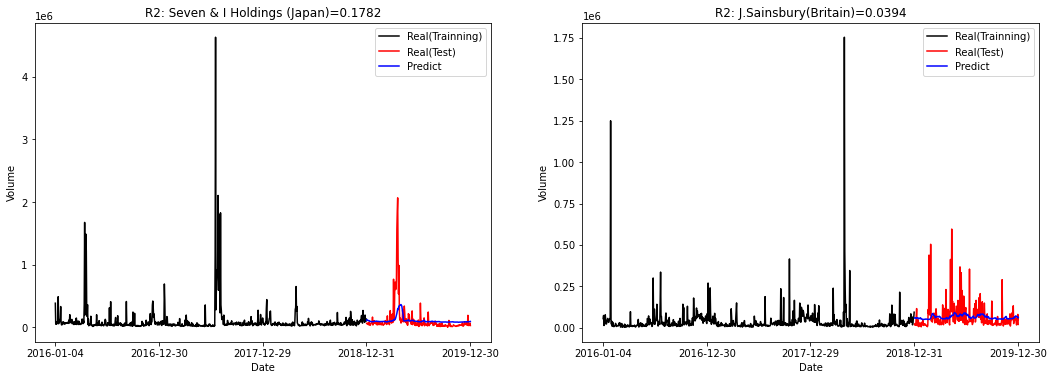

R2-2companies_average=0.1088

R2_scores_lists=[0.1782, 0.0394, 0.1088]
2回目
[Arguments]
num_company=2社 ['Metro (Canada)', 'Tesco(Britain)']
input_item=[6], outout_item=[6], output_category=['Volume']
train_size=754, time_step=10, num_epoch=5, num_units(neurons)=10

~~Make models~~
train_data=(2, 754, 1), test_data=(2, 252, 1)
SECTOR2
SECTOR2-1[Volume1つを予測]
X_train=(744, 10, 2), y_trains=(1488,)
y_trains2=(2, 744)
1/2
Epoch 1/5
24/24 [==============================] - 8s 17ms/step - loss: 1.1939
Epoch 2/5
24/24 [==============================] - 0s 17ms/step - loss: 1.1346
Epoch 3/5
24/24 [==============================] - 0s 17ms/step - loss: 0.9950
Epoch 4/5
24/24 [==============================] - 0s 17ms/step - loss: 0.8312
Epoch 5/5
24/24 [==============================] - 0s 17ms/step - loss: 0.7321

2/2
Epoch 1/5
24/24 [==============================] - 7s 16ms/step - loss: 0.9487
Epoch 2/5
24/24 [==============================] - 0s 18ms/step - loss: 1.1315
Epoch 3/5
24/24 [=====

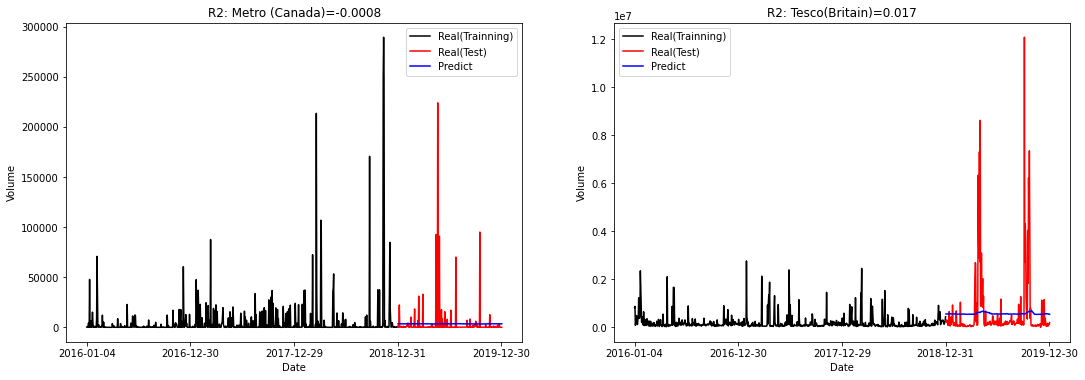

R2-2companies_average=0.0081

R2_scores_lists=[-0.0008, 0.017, 0.0081]
3回目
[Arguments]
num_company=2社 ['Walgreens Boots Alliance (USA)', 'J.Sainsbury(Britain)']
input_item=[6], outout_item=[6], output_category=['Volume']
train_size=754, time_step=10, num_epoch=5, num_units(neurons)=10

~~Make models~~
train_data=(2, 754, 1), test_data=(2, 252, 1)
SECTOR2
SECTOR2-1[Volume1つを予測]
X_train=(744, 10, 2), y_trains=(1488,)
y_trains2=(2, 744)
1/2
Epoch 1/5
24/24 [==============================] - 7s 18ms/step - loss: 0.8925
Epoch 2/5
24/24 [==============================] - 0s 16ms/step - loss: 0.8217
Epoch 3/5
24/24 [==============================] - 0s 17ms/step - loss: 0.8724
Epoch 4/5


KeyboardInterrupt: ignored

In [36]:
for i in range(10):
  print(f"{i+1}回目")
  multivariate_LSTM(all_data, num_company=2, input_vars=[6], output_category=['Volume'], output_vars=[6], outputs_company=2,
           train_size=754, time_step=10, epochs=5, units=10)